In [32]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

from fiesta.inference.lightcurve_model import FluxModel
from fiesta.train.Benchmarker import Benchmarker

In [ ]:
kn_model = FluxModel(directory="./model",
          name="Bu2024",
          filters=["2massj", "2massks", "sdssu", "ps1::r"])


benchmarker = Benchmarker(model=kn_model,
                          data_file="../../lightcurve_models/Bu2024/model/Bu2024_raw_data.h5",
                          filters=["2massj", "2massks", "sdssu", "ps1::r"],
                          metric_name="L2")

This surrogate Bu2024 should only be used in the following parameter ranges:
	 log10_mej_dyn: (-3.0, -1.6989700043360187)
	 v_ej_dyn: (0.12, 0.25)
	 Ye_dyn: (0.15, 0.3)
	 log10_mej_wind: (-2.0, -0.8860566476931633)
	 v_ej_wind: (0.03, 0.15)
	 inclination_EM: (0.0, 90.0)
Loaded SurrogateLightcurveModel with filters ['2massj', '2massks', 'sdssu', 'ps1::r'].
Loaded filters are: ['2massj', '2massks', 'sdssu', 'ps1::r'].


Text(0.5, 0, 'time in days')

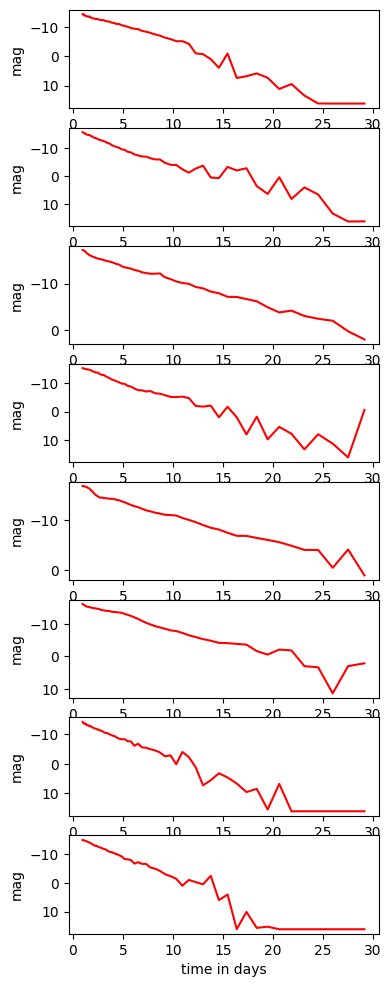

In [202]:
fig, ax = plt.subplots(8, 1, figsize=(4, 12))
filter = "ps1::r"

for j, k in enumerate(range(0,8)):
    ax[j].plot(kn_model.times, benchmarker.test_mag[filter][k], color="red")
    #ax[j].plot(kn_model.times, benchmarker.pred_mag[filter][k], color="blue")
    #ax[j].fill_between(kn_model.times, benchmarker.pred_mag[filter][k]-1, benchmarker.pred_mag[filter][k]+1, color="blue", alpha=0.4)
    ax[j].set_ylabel("mag")
    ax[j].invert_yaxis()


ax[-1].set_xlabel("time in days")


In [168]:
def fourier_transform(log_flux, pad_width=20):
    log_flux = log_flux.reshape(1000, 100)

    log_flux_arg = np.pad(log_flux, pad_width=((pad_width, pad_width), (0,0)), mode="edge")
    
    fft_log_flux = np.fft.fftshift(np.fft.fft2(log_flux_arg))
    
    fft_log_flux[:pad_width+400] = 0
    fft_log_flux[-400-pad_width:] = 0
    fft_log_flux[:, :20] = 0
    fft_log_flux[:, -20:] = 0
    
    fft_log_flux[np.abs(fft_log_flux)<4e3] = 0
    
    reconstructed_log_flux = np.fft.ifft2(np.fft.ifftshift(fft_log_flux))
    reconstructed_log_flux = reconstructed_log_flux[pad_width:-pad_width, :]

    return np.abs(reconstructed_log_flux)

with h5py.File("../../lightcurve_models/Bu2024/model/Bu2024_raw_data.h5") as f:
    nus = f["nus"][:]
    times = f["times"][:]
    log_flux = f["test"]["y"][-2].reshape(1000,100)

smooth = fourier_transform(log_flux)

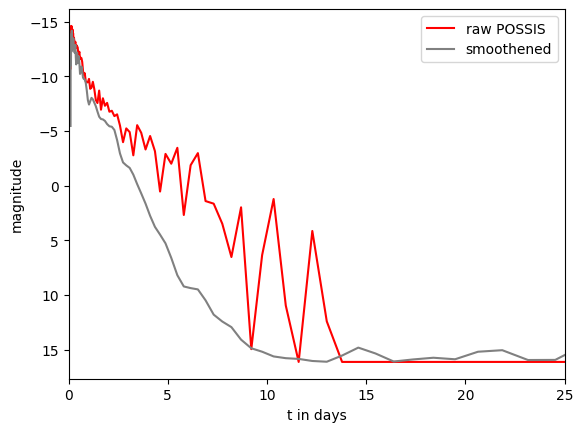

In [197]:
#plt.plot(kn_model.times, benchmarker.pred_mag[filter][-2], color="blue")
plt.plot(times, benchmarker.Filters[-1].get_mag(np.exp(log_flux), nus), color="red")
plt.plot(times, benchmarker.Filters[-1].get_mag(np.exp(smooth), nus), color="grey")

plt.ylabel("magnitude")
plt.xlabel("t in days")
plt.xlim(0, 25)

handels=[]
labels=["raw POSSIS", "smoothened"]
for color in ["red", "grey"]:
    handle, = plt.plot([], color=color)
    handels.append(handle)
plt.legend(handles=handels, labels=labels)
plt.gca().invert_yaxis()

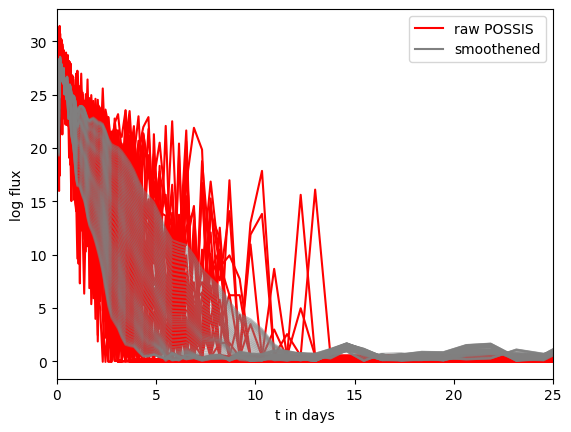

In [199]:
plt.plot(times, (log_flux[498:555,:].T), color="red")
plt.plot(times, (smooth[498:555,:].T), color="grey", alpha=0.5,)

plt.ylabel("log flux")
plt.xlabel("t in days")
plt.xlim(0, 25)

handels=[]
labels=["raw POSSIS", "smoothened"]
for color in ["red", "grey"]:
    handle, = plt.plot([], color=color)
    handels.append(handle)
plt.legend(handles=handels, labels=labels)

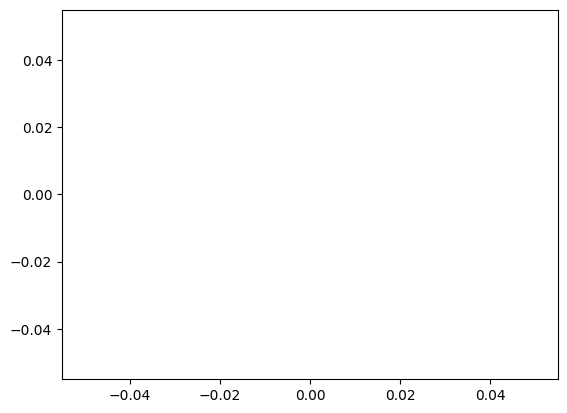

In [ ]:
plt.plot([], color=color)

In [159]:
299792458 / benchmarker.Filters[-1].nus * 1e9

Array([714.     , 711.4684 , 708.95465, 706.4586 , 703.9801 , 701.51886,
       699.0748 , 696.64777, 694.2375 , 691.8438 , 689.4666 , 687.1057 ,
       684.76086, 682.43207, 680.11896, 677.8215 , 675.53955, 673.2728 ,
       671.02136, 668.78485, 666.56323, 664.35626, 662.16394, 659.98596,
       657.8223 , 655.6728 , 653.5373 , 651.41565, 649.3077 , 647.21344,
       645.13257, 643.065  , 641.0107 , 638.9695 , 636.9412 , 634.9258 ,
       632.9231 , 630.9329 , 628.9553 , 626.9899 , 625.0369 , 623.096  ,
       621.1672 , 619.2502 , 617.3449 , 615.4514 , 613.5695 , 611.6991 ,
       609.83997, 607.9921 , 606.1555 , 604.3299 , 602.51526, 600.71155,
       598.9186 , 597.13617, 595.36444, 593.60315, 591.8523 , 590.1117 ,
       588.3814 , 586.6611 , 584.95087, 583.2506 , 581.5602 , 579.8796 ,
       578.20856, 576.54724, 574.8953 , 573.2529 , 571.61993, 569.99615,
       568.38153, 566.7761 , 565.17975, 563.5923 , 562.01373, 560.444  ,
       558.88293, 557.3307 , 555.787  , 554.25183, 

In [94]:
nus[498:556] /1e14

array([4.19495694, 4.2172645 , 4.23969069, 4.26223614, 4.28490148,
       4.30768734, 4.33059437, 4.35362322, 4.37677452, 4.40004894,
       4.42344713, 4.44696973, 4.47061743, 4.49439088, 4.51829075,
       4.54231771, 4.56647243, 4.59075561, 4.61516792, 4.63971004,
       4.66438268, 4.68918651, 4.71412225, 4.73919058, 4.76439222,
       4.78972788, 4.81519826, 4.84080409, 4.86654608, 4.89242497,
       4.91844146, 4.94459631, 4.97089024, 4.99732399, 5.02389831,
       5.05061395, 5.07747165, 5.10447217, 5.13161627, 5.15890472,
       5.18633828, 5.21391772, 5.24164383, 5.26951737, 5.29753913,
       5.32570991, 5.35403049, 5.38250167, 5.41112426, 5.43989905,
       5.46882685, 5.49790849, 5.52714477, 5.55653653, 5.58608458,
       5.61578975, 5.6456529 , 5.67567484])